In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Reading the dataset
aircraft_train_df = pd.read_csv('CMAPSSData/train_FD001.txt', sep=' ', header=None)

# Drop empty unnamed columns at the end (caused by extra spaces in the text file)
aircraft_train_df = aircraft_train_df.dropna(axis=1, how='all')

# Rename columns (s1 to s21 are sensor readings)
aircraft_train_df.columns = ['engine_id', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3',
                             's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                             's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

# Preview the dataset
aircraft_train_df.head()


engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1      -0.0007      -0.0004        100.0  518.67  641.82   
1          1      2       0.0019      -0.0003        100.0  518.67  642.15   
2          1      3      -0.0043       0.0003        100.0  518.67  642.35   
3          1      4       0.0007       0.0000        100.0  518.67  642.35   
4          1      5      -0.0019      -0.0002        100.0  518.67  642.37   

        s3       s4     s5  ...     s12      s13      s14     s15   s16  s17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393   

    s18    s19    s20      s21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [9]:
# Reading test data
aircraft_test_df = pd.read_csv('CMAPSSData/test_FD001.txt', sep=' ', header=None)

# Drop empty columns
aircraft_test_df = aircraft_test_df.dropna(axis=1, how='all')

# Assign column names
aircraft_test_df.columns = ['engine_id','cycle','op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                            's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# Preview
aircraft_test_df.head()


engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1       0.0023       0.0003        100.0  518.67  643.02   
1          1      2      -0.0027      -0.0003        100.0  518.67  641.71   
2          1      3       0.0003       0.0001        100.0  518.67  642.46   
3          1      4       0.0042       0.0000        100.0  518.67  642.44   
4          1      5       0.0014       0.0000        100.0  518.67  642.51   

        s3       s4     s5  ...     s12      s13      s14     s15   s16  s17  \
0  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392   
1  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393   
2  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393   
3  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391   
4  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390   

    s18    s19    s20      s21  
0  2388  100.0  38.86  23.3735  
1  2388  100.0  39.02  23.3916  
2  2388  100.0  39.08  23.4166  
3  2388  100.0  39.00  23.3737  
4  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

In [11]:
# Reading the truth data (actual time to failure for test engines)
aircraft_rul_df = pd.read_csv('CMAPSSData/RUL_FD001.txt', sep=' ', header=None)

# Drop empty column (due to extra space)
aircraft_rul_df = aircraft_rul_df.dropna(axis=1, how='all')

# Rename column
aircraft_rul_df.columns = ['time-to-failure']

# Preview
aircraft_rul_df.head()


time-to-failure
0              112
1               98
2               69
3               82
4               91

In [12]:
# describing the Dataset information 
aircraft_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_id    20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   op_setting1  20631 non-null  float64
 3   op_setting2  20631 non-null  float64
 4   op_setting3  20631 non-null  float64
 5   s1           20631 non-null  float64
 6   s2           20631 non-null  float64
 7   s3           20631 non-null  float64
 8   s4           20631 non-null  float64
 9   s5           20631 non-null  float64
 10  s6           20631 non-null  float64
 11  s7           20631 non-null  float64
 12  s8           20631 non-null  float64
 13  s9           20631 non-null  float64
 14  s10          20631 non-null  float64
 15  s11          20631 non-null  float64
 16  s12          20631 non-null  float64
 17  s13          20631 non-null  float64
 18  s14          20631 non-null  float64
 19  s15 

In [13]:
# description details of Train dataset 
aircraft_train_df.describe()

engine_id         cycle   op_setting1   op_setting2  op_setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000      20631.0   
mean      51.506568    108.807862     -0.000009      0.000002        100.0   
std       29.227633     68.880990      0.002187      0.000293          0.0   
min        1.000000      1.000000     -0.008700     -0.000600        100.0   
25%       26.000000     52.000000     -0.001500     -0.000200        100.0   
50%       52.000000    104.000000      0.000000      0.000000        100.0   
75%       77.000000    156.000000      0.001500      0.000300        100.0   
max      100.000000    362.000000      0.008700      0.000600        100.0   

             s1            s2            s3            s4            s5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

                s17      s18      s19           s20           s21  
count  20631.000000  20631.0  20631.0  20631.000000  20631.000000  
mean     393.210654   2388.0    100.0     38.816271     23.289705  
std        1.548763      0.0      0.0      0.180746      0.108251  
min      388.000000   2388.0    100.0     38.140000     22.894200  
25%      392.000000   2388.0    100.0     38.700000     23.221800  
50%      393.000000   2388.0    100.0     38.830000     23.297900  
75%      394.000000   2388.0    100.0     38.950000     23.366800  
max      400.000000   2388.0    100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [14]:
# Checking for the missing values
aircraft_train_df.isnull().sum()

engine_id      0
cycle          0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

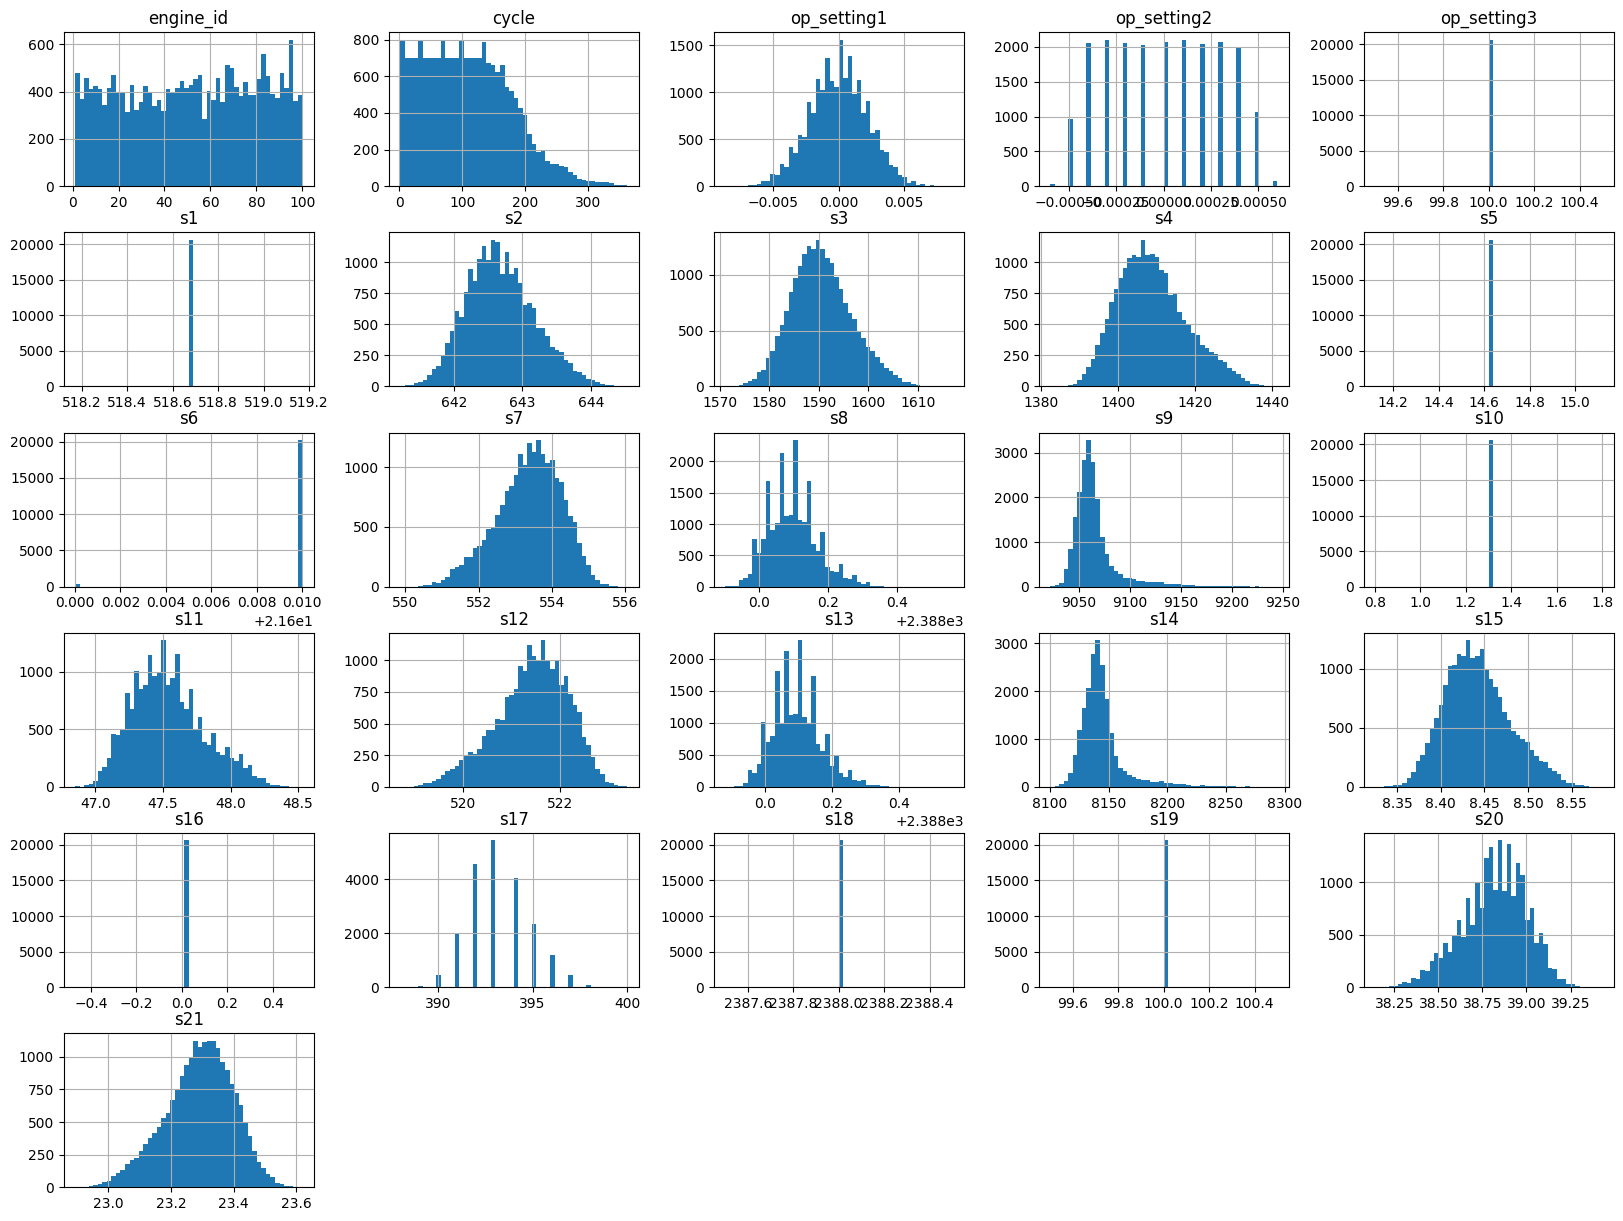

In [15]:
# Histogram plots of the varibles in the tarin data.
%matplotlib inline
aircraft_train_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: title={'center': 'Mean of all columns'}>

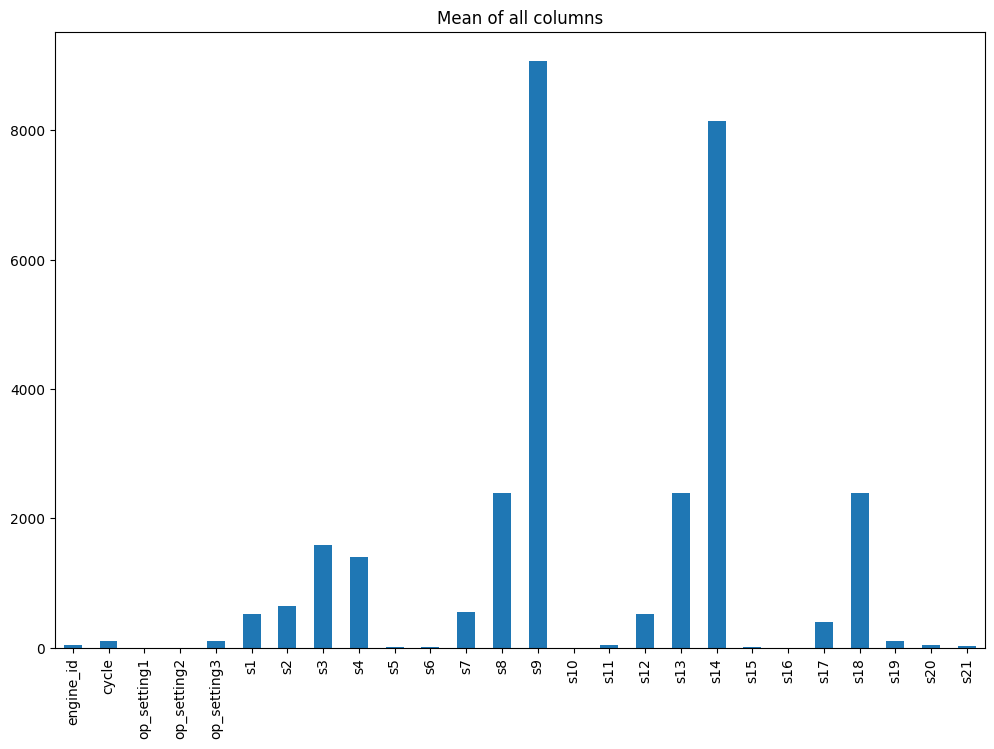

In [16]:
# mean of all columns in terms of barplot
aircraft_train_df.mean().plot.bar(figsize=(12,8), title="Mean of all columns")

<Axes: title={'center': 'std of all columns'}>

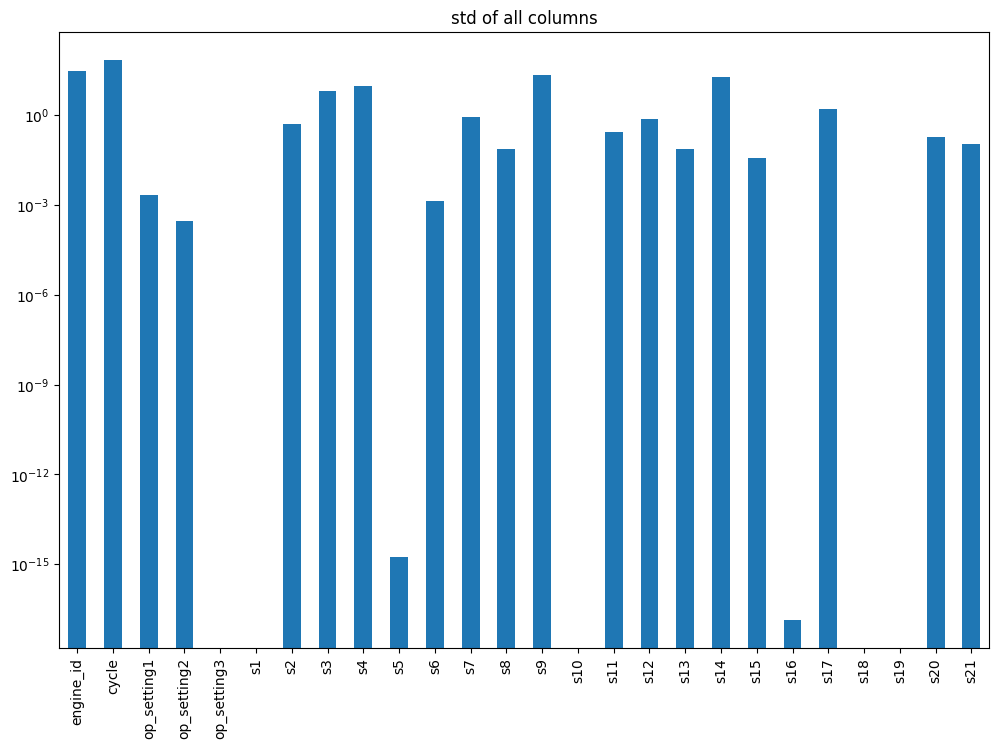

In [17]:
# std of all columns with log transformation.
aircraft_train_df.std().plot.bar(figsize=(12,8),logy=True, title="std of all columns")

In [19]:
## Correlation of the dataset:
import seaborn as sns
features = aircraft_train_df[['op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                                               's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']]
corr_plot_variables=features.corr()

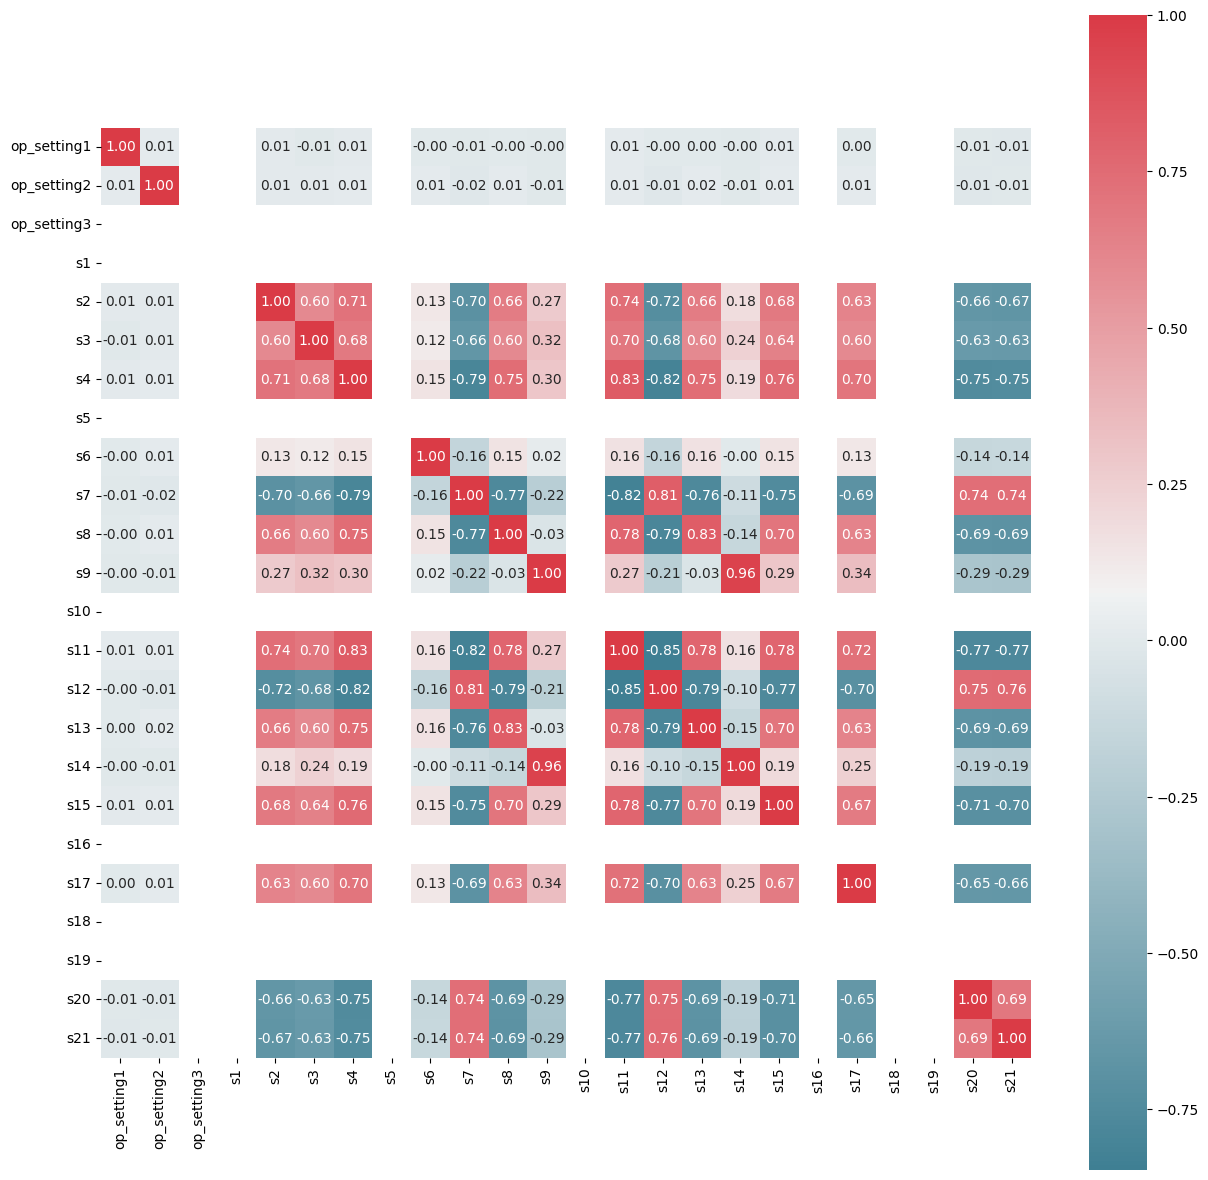

In [20]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_plot_variables, annot=True, fmt='.2f',mask=np.zeros_like(corr_plot_variables, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [23]:
# Remaining useful life feature creation for train dataset
data_RUL = pd.DataFrame(aircraft_train_df.groupby('engine_id')['cycle'].max()).reset_index()
data_RUL.columns = ['engine_id', 'max_cycle']
aircraft_train_df = aircraft_train_df.merge(data_RUL, on=['engine_id'], how='left')
aircraft_train_df['RUL'] = aircraft_train_df['max_cycle'] - aircraft_train_df['cycle']
aircraft_train_df = aircraft_train_df.drop('max_cycle', axis=1)
aircraft_train_df.head()

engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1      1      -0.0007      -0.0004        100.0  518.67  641.82   
1          1      2       0.0019      -0.0003        100.0  518.67  642.15   
2          1      3      -0.0043       0.0003        100.0  518.67  642.35   
3          1      4       0.0007       0.0000        100.0  518.67  642.35   
4          1      5      -0.0019      -0.0002        100.0  518.67  642.37   

        s3       s4     s5  ...     s15   s16  s17   s18    s19    s20  \
0  1589.70  1400.60  14.62  ...  8.4195  0.03  392  2388  100.0  39.06   
1  1591.82  1403.14  14.62  ...  8.4318  0.03  392  2388  100.0  39.00   
2  1587.99  1404.20  14.62  ...  8.4178  0.03  390  2388  100.0  38.95   
3  1582.79  1401.87  14.62  ...  8.3682  0.03  392  2388  100.0  38.88   
4  1582.85  1406.22  14.62  ...  8.4294  0.03  393  2388  100.0  38.90   

       s21  max_cycle_x  RUL  max_cycle_y  
0  23.4190          192  191          192  
1  23.4236          192  190          192  
2  23.3442          192  189          192  
3  23.3739          192  188          192  
4  23.4044          192  187          192  

[5 rows x 29 columns]

In [25]:
valid_data = pd.DataFrame(aircraft_test_df.groupby('engine_id')['cycle'].max()).reset_index()
valid_data.columns = ['engine_id', 'last_cycle']
df_truth_data = pd.merge(aircraft_test_df, valid_data, on='engine_id')
df_truth_data = df_truth_data[df_truth_data['cycle'] == df_truth_data['last_cycle']]
df_truth_data = df_truth_data.drop(['last_cycle'],axis=1)
df_truth_data.reset_index(drop=True, inplace=True)
df_truth_data = pd.concat([df_truth_data, aircraft_rul_df], axis=1)
df_test_data = df_truth_data.rename(columns={'time-to-failure': 'RUL'})

In [26]:
df_test_data.head()

engine_id  cycle  op_setting1  op_setting2  op_setting3      s1      s2  \
0          1     31      -0.0006       0.0004        100.0  518.67  642.58   
1          2     49       0.0018      -0.0001        100.0  518.67  642.55   
2          3    126      -0.0016       0.0004        100.0  518.67  642.88   
3          4    106       0.0012       0.0004        100.0  518.67  642.78   
4          5     98      -0.0013      -0.0004        100.0  518.67  642.27   

        s3       s4     s5  ...      s13      s14     s15   s16  s17   s18  \
0  1581.22  1398.91  14.62  ...  2388.06  8130.11  8.4024  0.03  393  2388   
1  1586.59  1410.83  14.62  ...  2388.09  8126.90  8.4505  0.03  391  2388   
2  1589.75  1418.89  14.62  ...  2388.14  8131.46  8.4119  0.03  395  2388   
3  1594.53  1406.88  14.62  ...  2388.11  8133.64  8.4634  0.03  395  2388   
4  1589.94  1419.36  14.62  ...  2388.15  8125.74  8.4362  0.03  394  2388   

     s19    s20      s21  RUL  
0  100.0  38.81  23.3552  112  
1  100.0  38.81  23.2618   98  
2  100.0  38.93  23.2740   69  
3  100.0  38.58  23.2581   82  
4  100.0  38.75  23.4117   91  

[5 rows x 27 columns]

In [27]:
# correlation of the all features with the RUL variable. 
for col in aircraft_train_df.columns:
    aircraft_train_df[col] = pd.to_numeric(aircraft_train_df[col],errors='coerce')
corr_m = aircraft_train_df.corr()
corr_m['RUL'].sort_values(ascending=False)

RUL            1.000000
s12            0.671983
s7             0.657223
s21            0.635662
s20            0.629428
max_cycle_x    0.363152
max_cycle_y    0.363152
engine_id      0.078753
op_setting2   -0.001948
op_setting1   -0.003198
s6            -0.128348
s14           -0.306769
s9            -0.390102
s13           -0.562569
s8            -0.563968
s3            -0.584520
s17           -0.606154
s2            -0.606484
s15           -0.642667
s4            -0.678948
s11           -0.696228
cycle         -0.736241
op_setting3         NaN
s1                  NaN
s5                  NaN
s10                 NaN
s16                 NaN
s18                 NaN
s19                 NaN
Name: RUL, dtype: float64

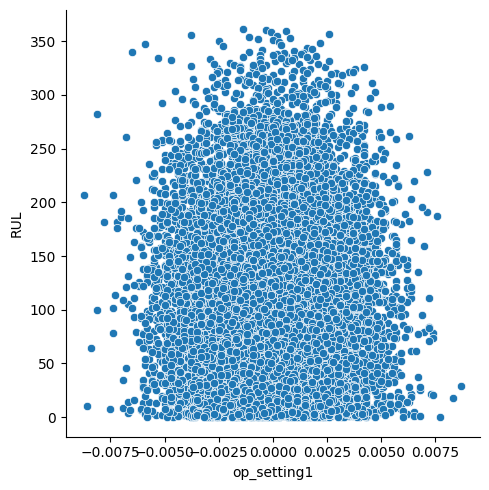

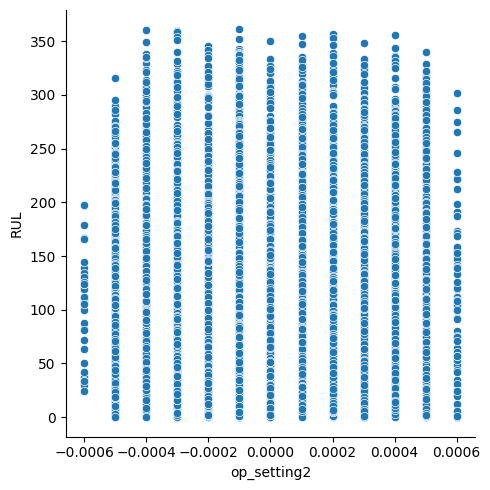

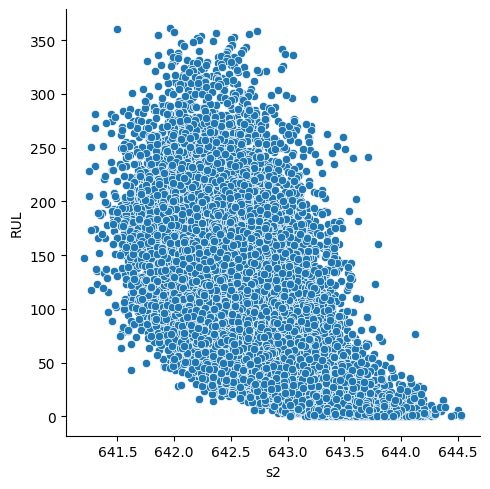

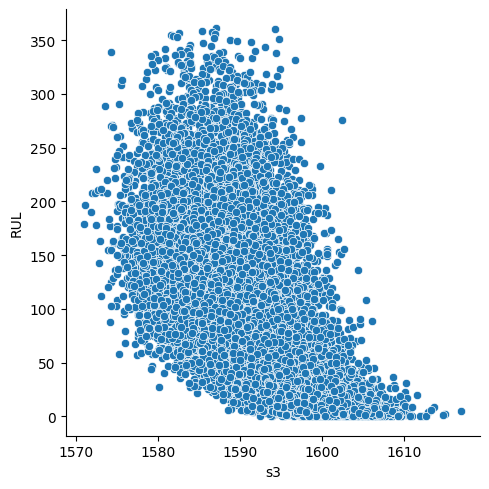

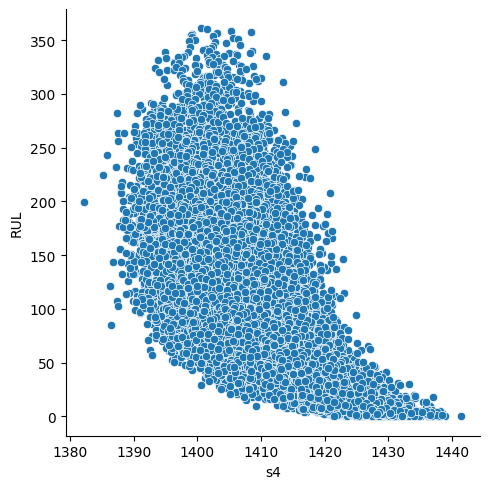

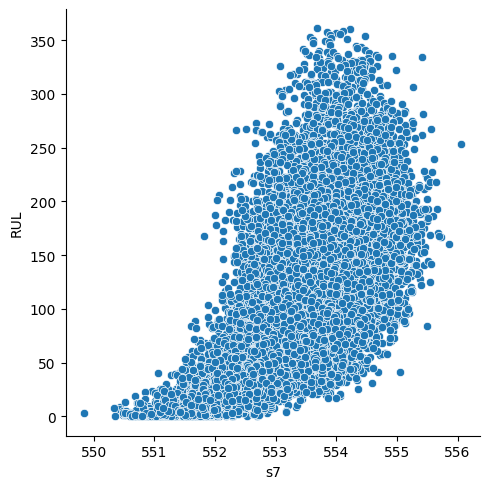

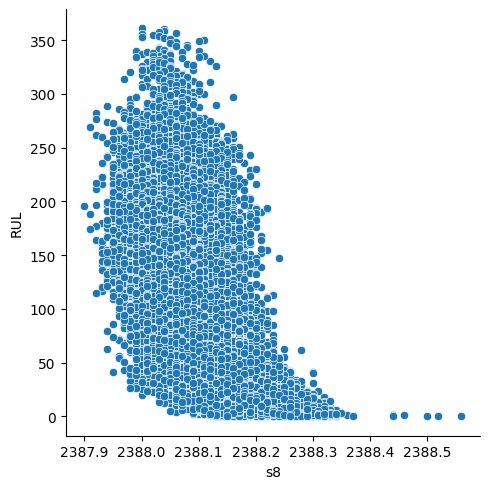

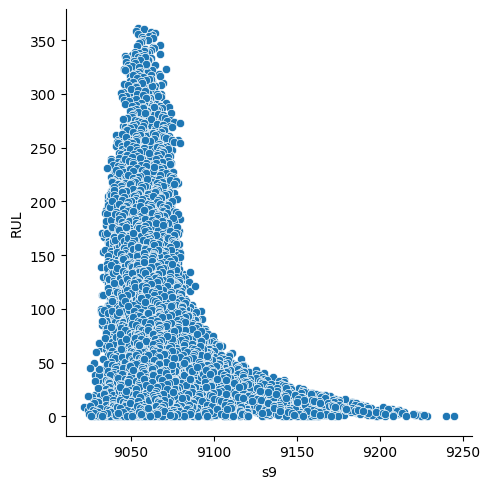

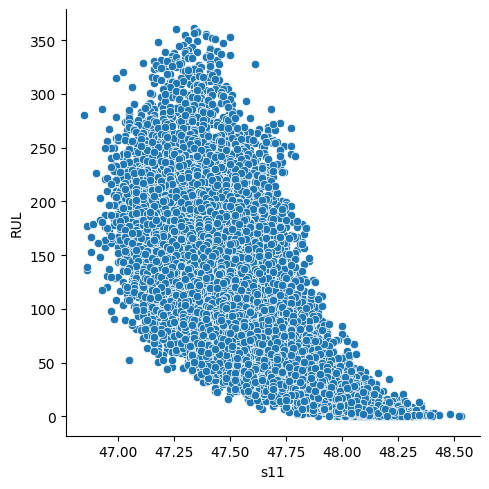

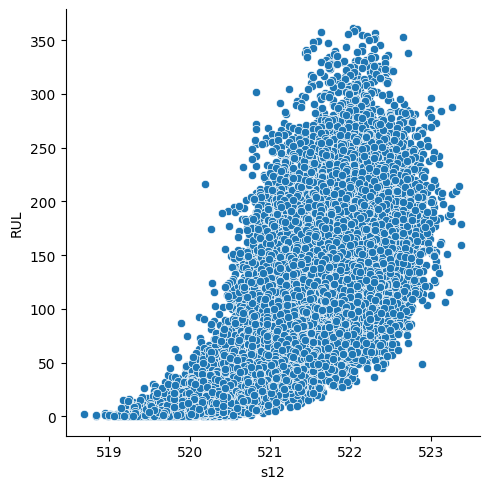

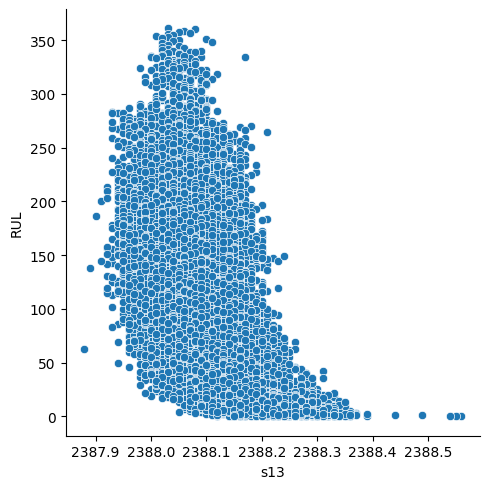

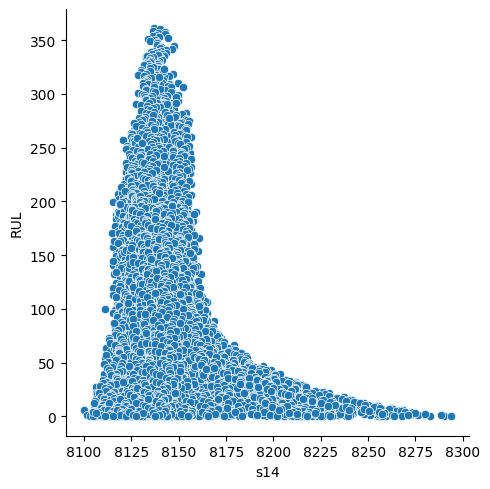

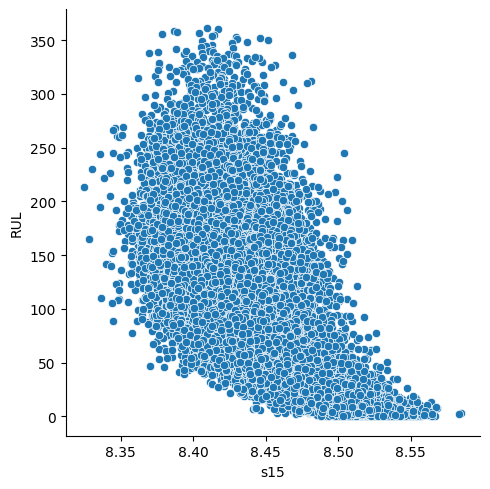

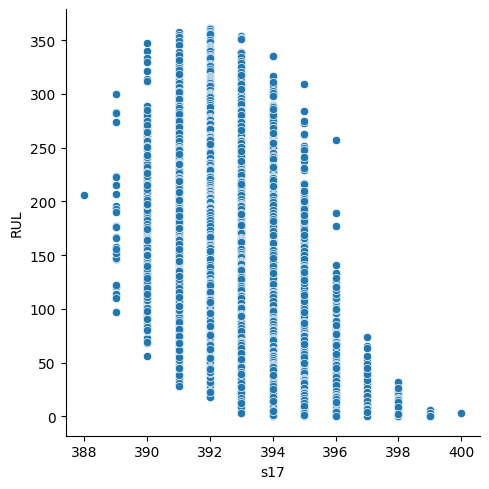

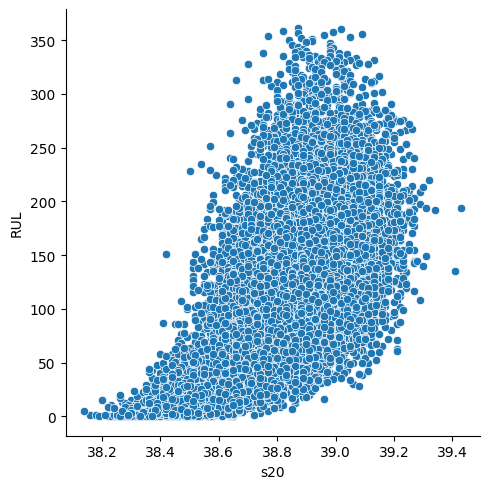

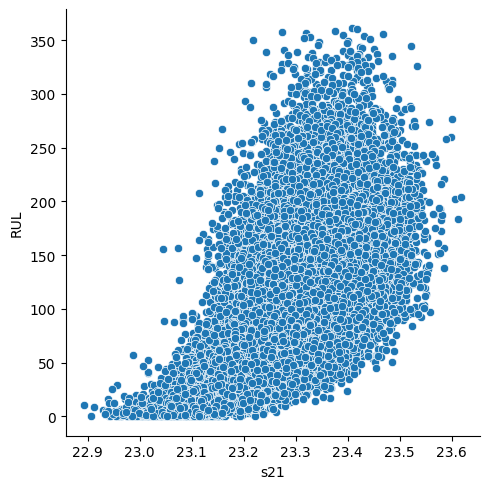

In [28]:
attributes = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11',
                                               's12','s13','s14','s15','s17','s20','s21']
for i in range(len(attributes)):
    sns.relplot(x=attributes[i], y="RUL", data=aircraft_train_df)

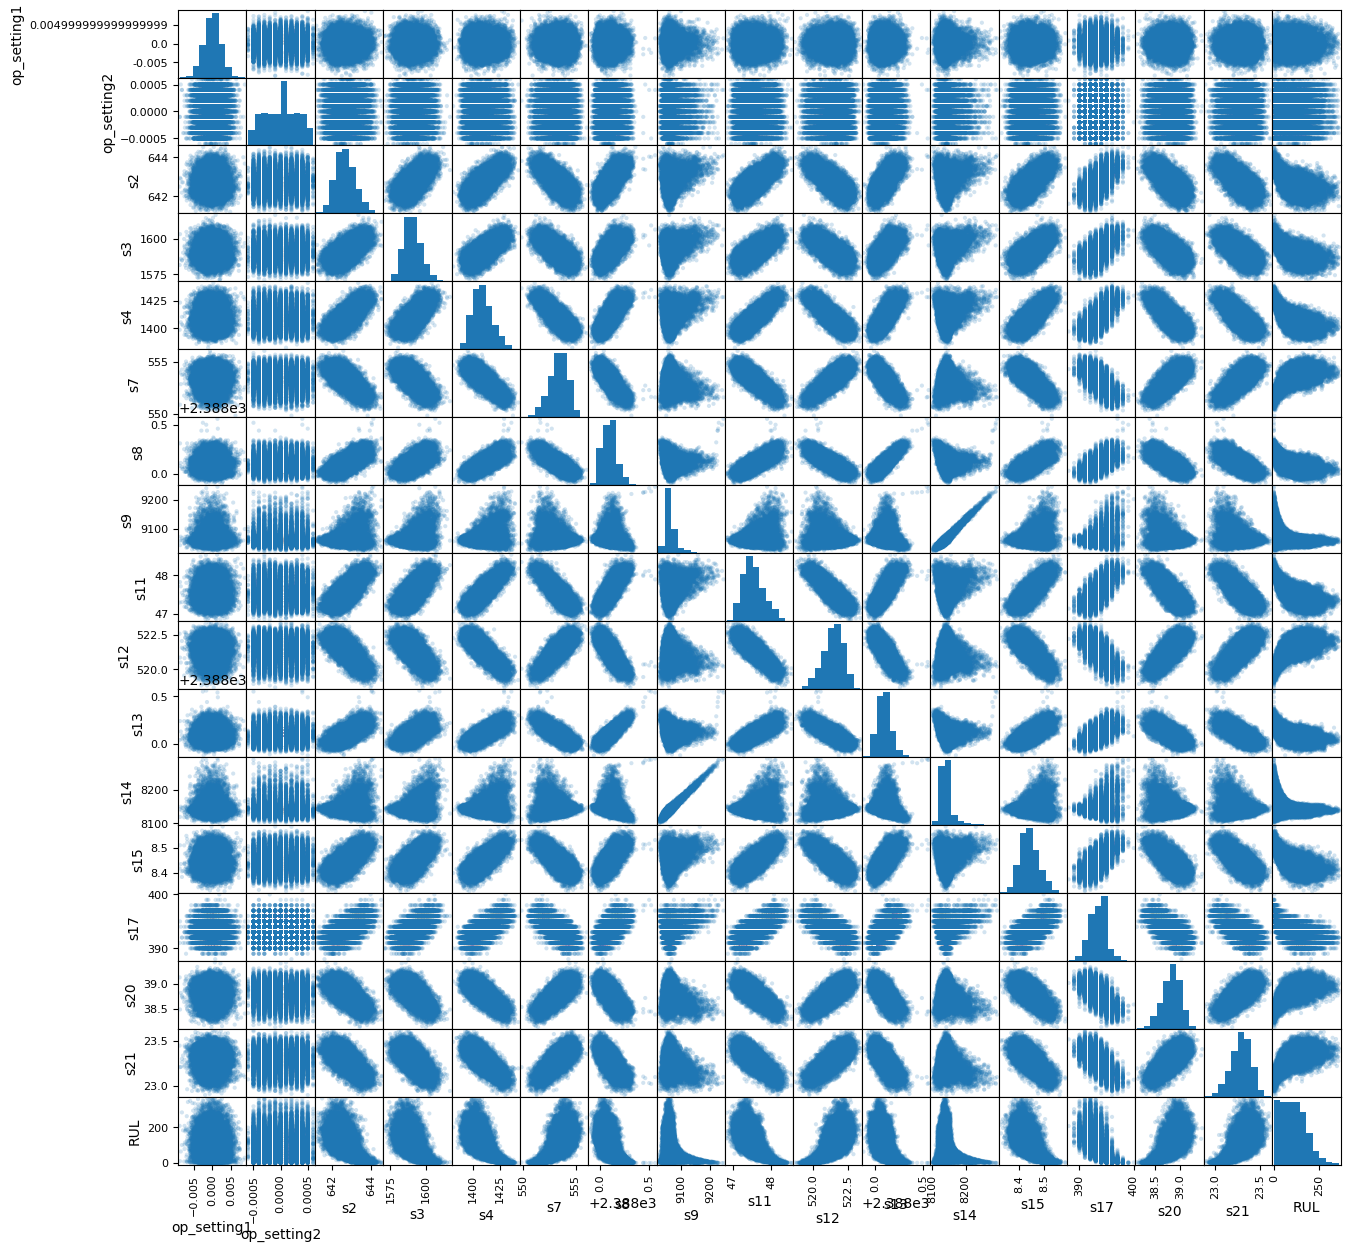

In [29]:
## Scatter Plot 
from pandas.plotting import scatter_matrix
attributes = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11',
                                               's12','s13','s14','s15','s17','s20','s21','RUL']
fig = scatter_matrix(aircraft_train_df[attributes],alpha=0.2, figsize=(15, 15))
plt.show()

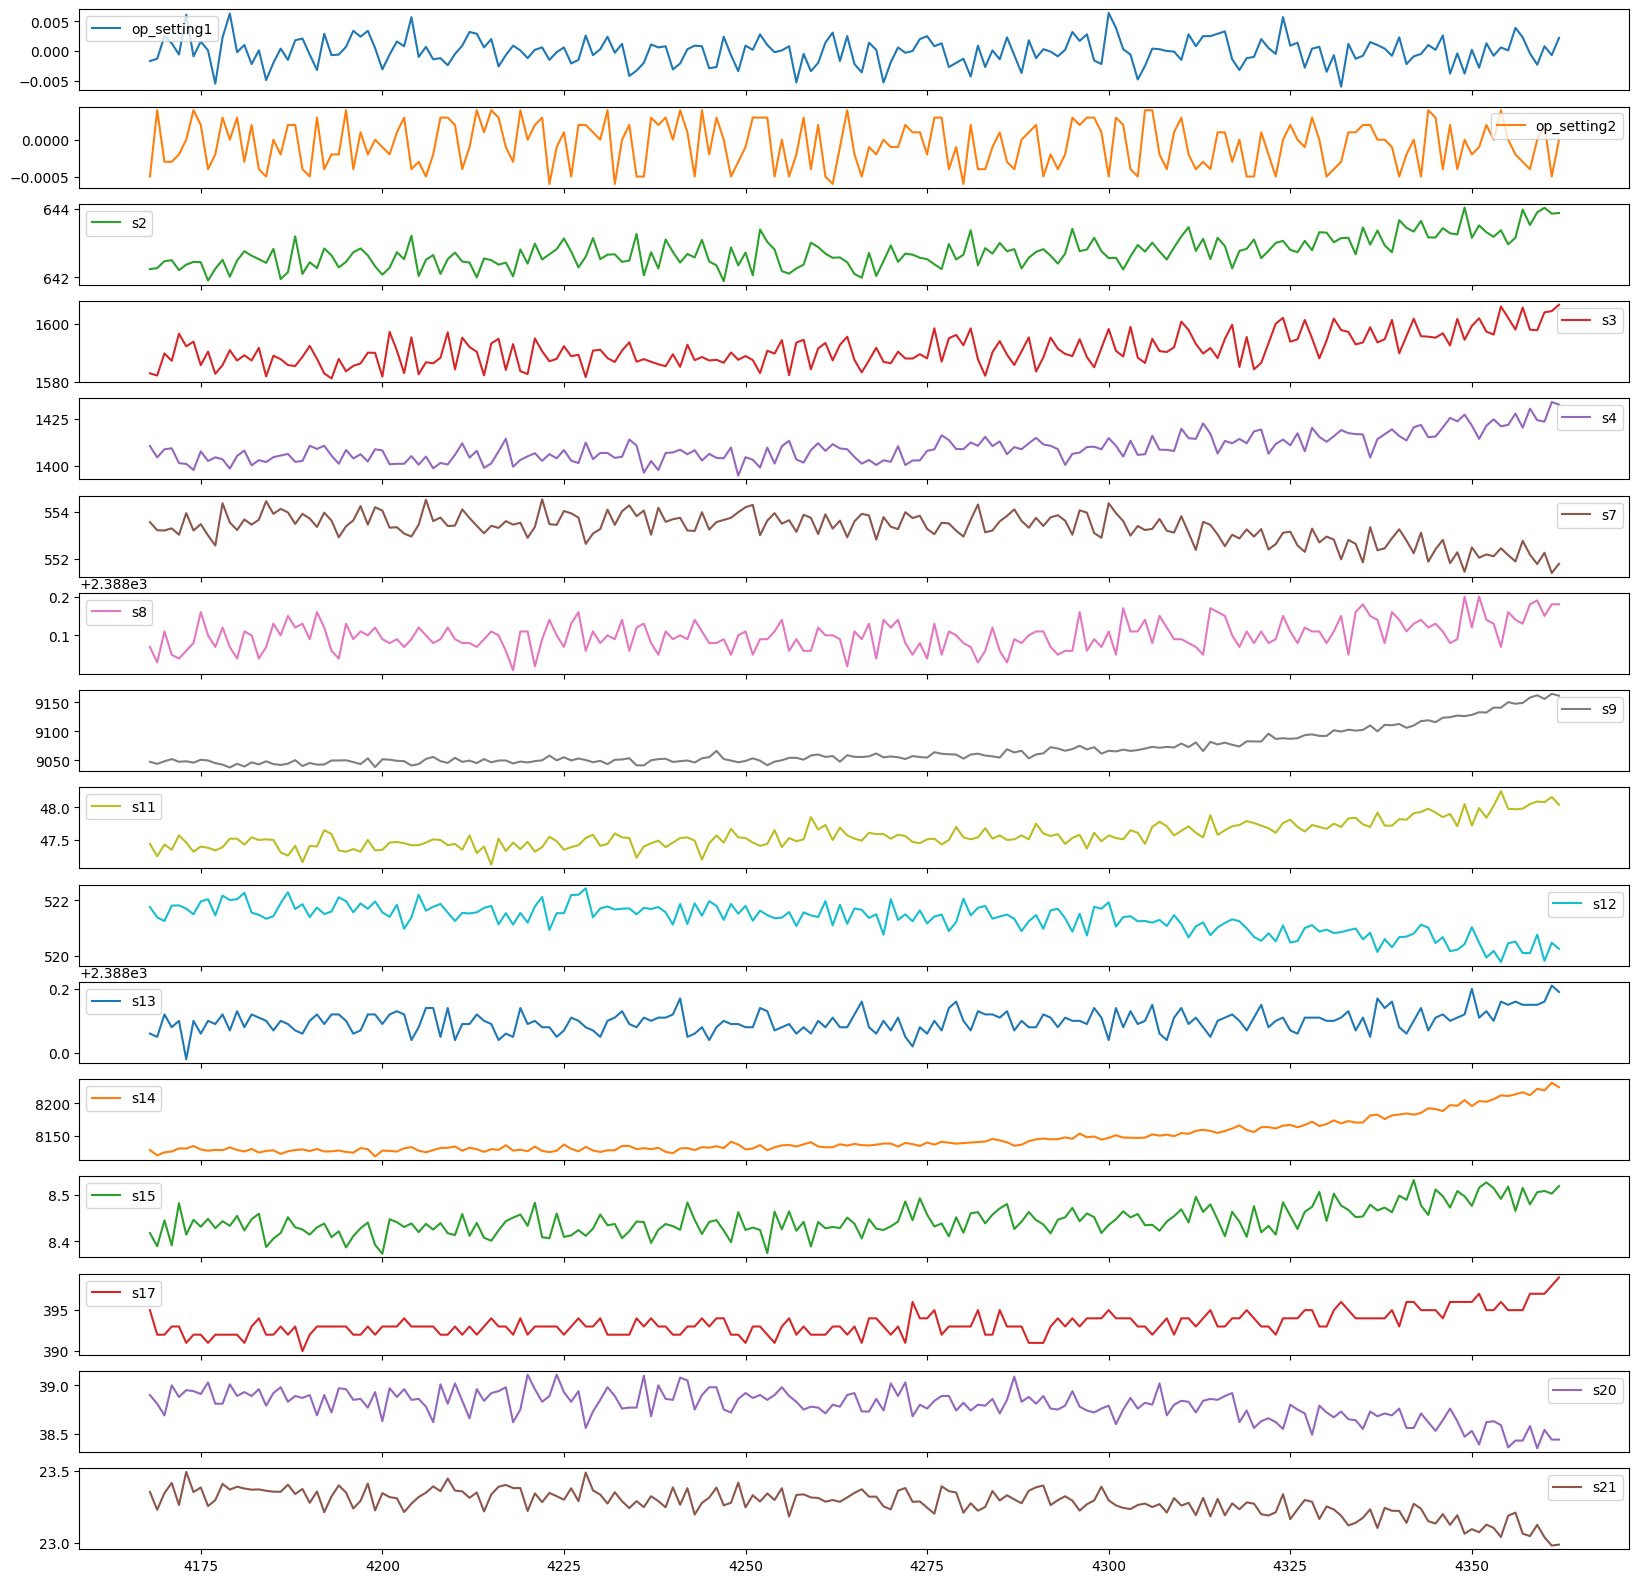

In [30]:
#for random engine num 21
engine_id_21 = aircraft_train_df[aircraft_train_df['engine_id'] == 21]

# few sensor values are ignores since they don't change with time 
feature_col = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']
engine_id_21 = engine_id_21[feature_col]
engine_id_21_plot = engine_id_21.plot(subplots=True, sharex=True, figsize=(20,20))

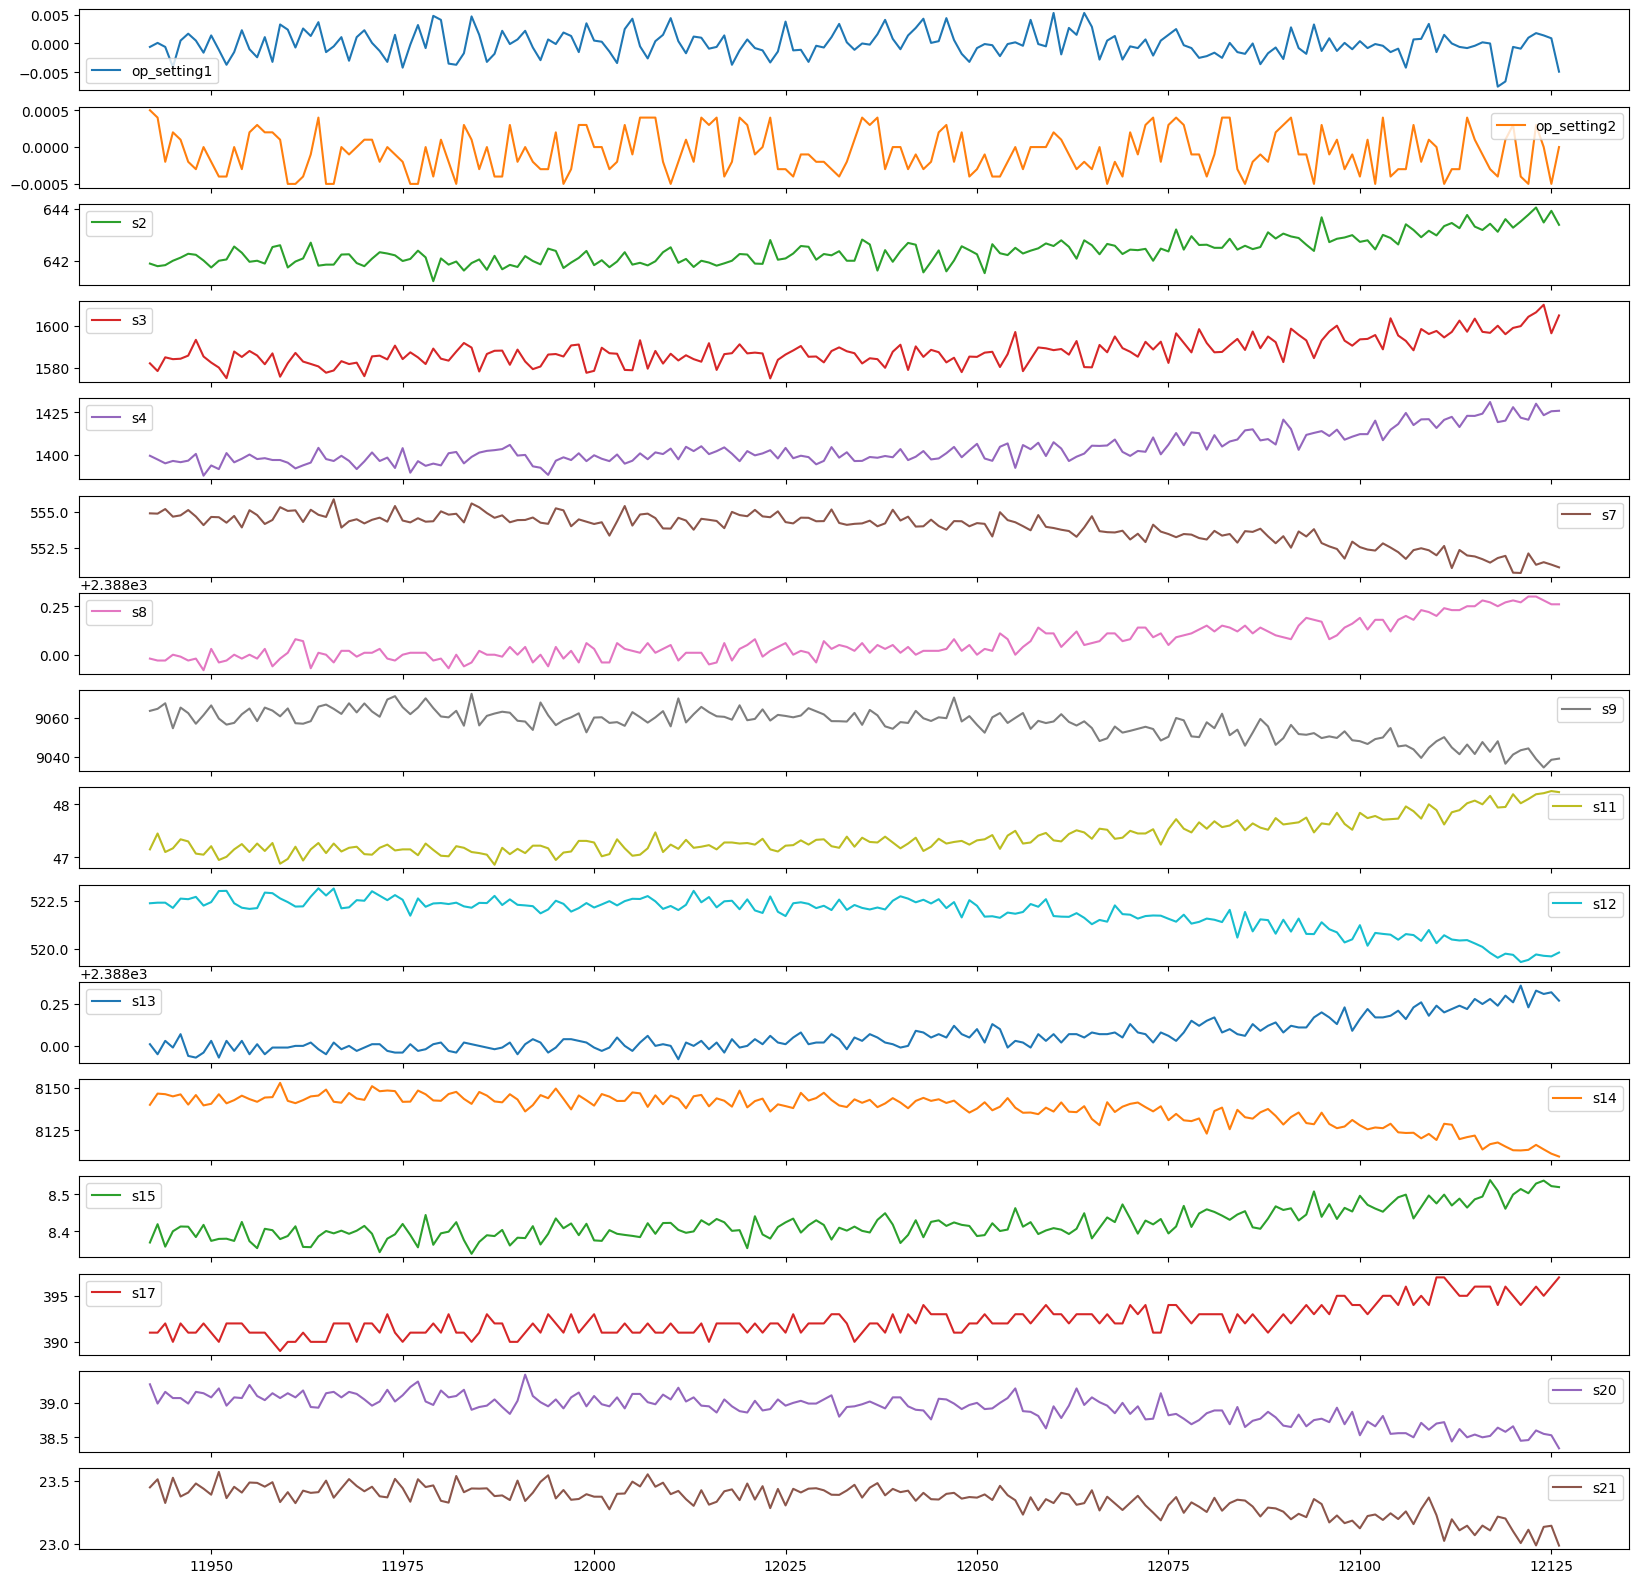

In [31]:
#for random engine num 21
engine_id_61 = aircraft_train_df[aircraft_train_df['engine_id'] == 61]
engine_id_61 = engine_id_61[feature_col]
engine_id_61_plot = engine_id_61.plot(subplots=True, sharex=True, figsize=(20,20))

## Modelling 

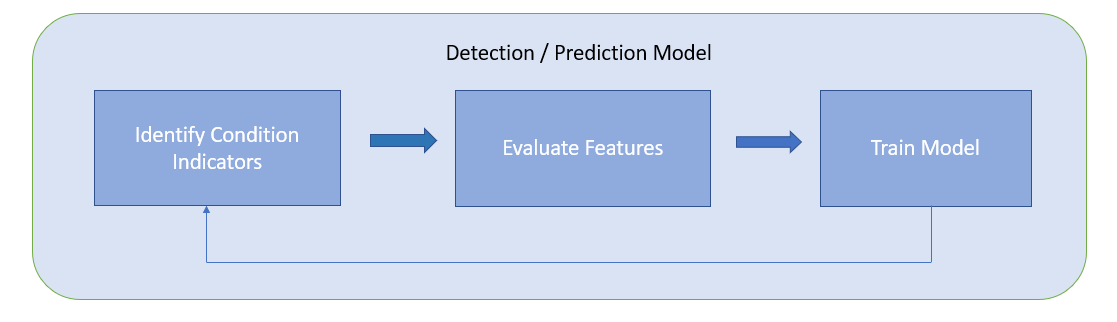

In [32]:
from PIL import Image
Image.open('CMAPSSData/Model.png')

In [34]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
features = ['op_setting1','op_setting2','s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']

#Features which are constant with time are not consideredfor modelling 
# features_orig = ['op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16',
#                  's17','s18','s19','s20','s21']
# features = features_orig

In [36]:
X_train = aircraft_train_df[features]
y_train = aircraft_train_df['RUL']

X_test = df_test_data[features]
y_test = df_test_data['RUL']

In [37]:
#Selecting numerical dataframe in train set
x_train_num = X_train.select_dtypes(include=np.number)

#Selecting categorical dataframe in train set
x_train_cat = X_train.select_dtypes(exclude=['number'])

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)),('robust_scalar',RobustScaler()),])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', fill_value=0)),('onehot', OneHotEncoder(handle_unknown='ignore')),])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(x_train_num.columns)
cat_attribs = list(x_train_cat.columns)

#full pipeline of numeric attributes
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs), ("cat",cat_pipeline,cat_attribs)])

#Using full_pipeline perform fit and transform on training data
x_train_prepared = full_pipeline.fit_transform(X_train)

In [40]:
x_test_prepared = full_pipeline.transform(X_test)

In [41]:
x_train_prepared.shape

(20631, 16)

In [42]:
x_test_prepared.shape

(100, 16)

In [44]:
full_pipeline.get_feature_names_out()


array(['num__op_setting1', 'num__op_setting2', 'num__s2', 'num__s3',
       'num__s4', 'num__s7', 'num__s8', 'num__s9', 'num__s11', 'num__s12',
       'num__s13', 'num__s14', 'num__s15', 'num__s17', 'num__s20',
       'num__s21'], dtype=object)

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from numpy import mean, std

# Create and train the model
model_linear = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
model_linear.fit(x_train_prepared, y_train)

# Predictions
model_linear_train_predictions = model_linear.predict(x_train_prepared)
model_linear_test_predictions = model_linear.predict(x_test_prepared)

# Evaluation
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_linear_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_linear_test_predictions)))

print("r2_score on Train data:", r2_score(y_train, model_linear_train_predictions)) 
print("r2_score on Test data:", r2_score(y_test, model_linear_test_predictions)) 
print(' ')

# Cross-validation
print("Cross Validation on Training Data")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_linear, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_linear, x_train_prepared, y_train, cv=cv))


Root Mean Squared Error: 32.042741032055
Mean Absolute Error: 25.59380624989196
r2_score on Train data: 0.5794932912981681
r2_score on Test data: 0.40543440405266185
 
Cross Validation on Training Data
MAE: -34.143 (0.717)
Cross validation score: [0.6085437  0.57880665 0.5809385  0.5602833  0.57428878 0.59029114
 0.55806617 0.56772493 0.59564827 0.57106705 0.58910054 0.59017042
 0.58216042 0.59897169 0.59212836 0.58170093 0.55216635 0.56082849
 0.57219257 0.56467575 0.57080056 0.57456876 0.57066856 0.55970919
 0.58155557 0.57477407 0.59454576 0.59137234 0.58073174 0.58952339]


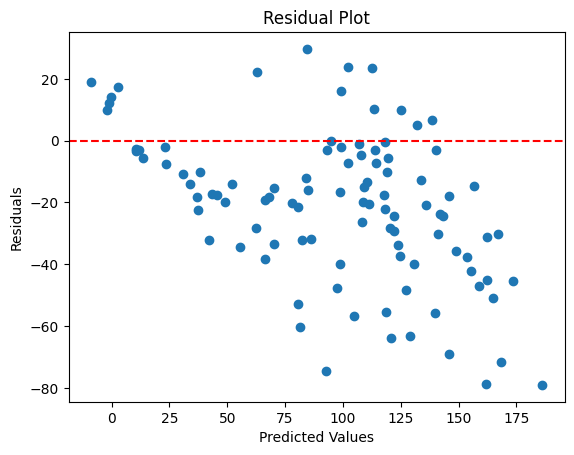

In [52]:
import matplotlib.pyplot as plt

y_pred = model_linear.predict(x_test_prepared)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


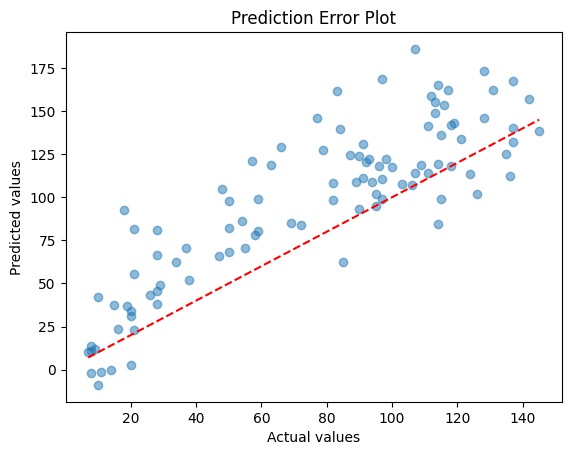

In [54]:
import matplotlib.pyplot as plt

# Predictions on test set
y_pred = model_linear.predict(x_test_prepared)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction Error Plot')
plt.show()


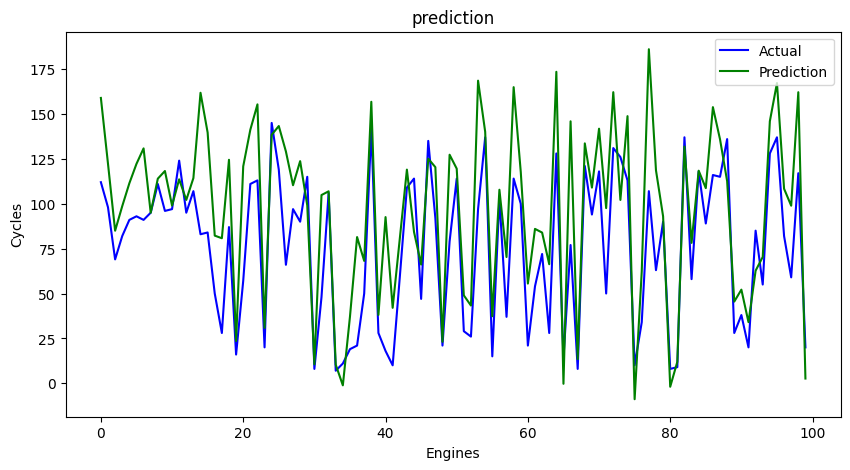

In [55]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(model_linear_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()

In [ ]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_train_prepared_poly = poly_features.fit_transform(x_train_prepared)
x_test_prepared_poly = poly_features.fit_transform(x_test_prepared)

poly_reg = LinearRegression()
poly_reg.fit(x_train_prepared_poly, y_train)

poly_reg_train_predict = poly_reg.predict(x_train_prepared_poly)
poly_reg_test_predict = poly_reg.predict(x_test_prepared_poly)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, poly_reg_test_predict)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, poly_reg_test_predict)))
print("r2_score on Train data :", r2_score(y_train,poly_reg_train_predict)) 
print("r2_score on Test data :", r2_score(y_test,poly_reg_test_predict)) 
print(' ')
print("Cross Validation on Training Data")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(poly_reg, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(poly_reg, x_train_prepared_poly, y_train, cv=cv))

Root Mean Squared Error: 31.284620963089033
Mean Absolute Error: 23.84561233137104
r2_score on Train data : 0.6269041117496396
r2_score on Test data : 0.4332360076266616
 
Cross Validation on Training Data
MAE: -34.143 (0.717)
Cross validation score: [0.64932443 0.62318191 0.62273919 0.60899291 0.61973574 0.6313079
 0.60394084 0.61572405 0.63251219 0.60914242 0.63408015 0.63376826
 0.62411375 0.6439574  0.62899706 0.61900402 0.60165096 0.59997267
 0.61595728 0.61141103 0.61529384 0.60981144 0.61763886 0.59865034
 0.62418483 0.62197957 0.64024372 0.62824    0.62212432 0.63723807]


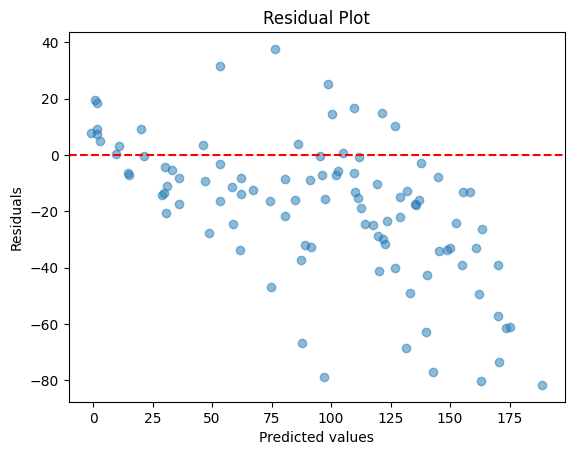

In [58]:
import matplotlib.pyplot as plt

# Predict using your polynomial regression model
y_pred_train = poly_reg.predict(x_train_prepared_poly)
y_pred_test = poly_reg.predict(x_test_prepared_poly)

# Calculate residuals for test data
residuals = y_test - y_pred_test

plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


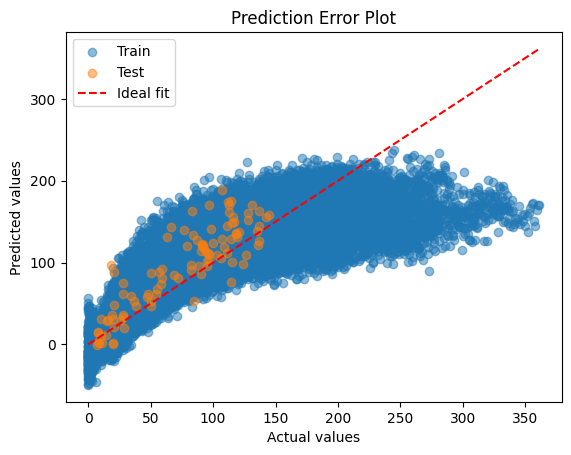

In [60]:
import matplotlib.pyplot as plt

# Predictions on training and test sets
y_train_pred = poly_reg.predict(x_train_prepared_poly)
y_test_pred = poly_reg.predict(x_test_prepared_poly)

plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'r--', label='Ideal fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction Error Plot')
plt.legend()
plt.show()


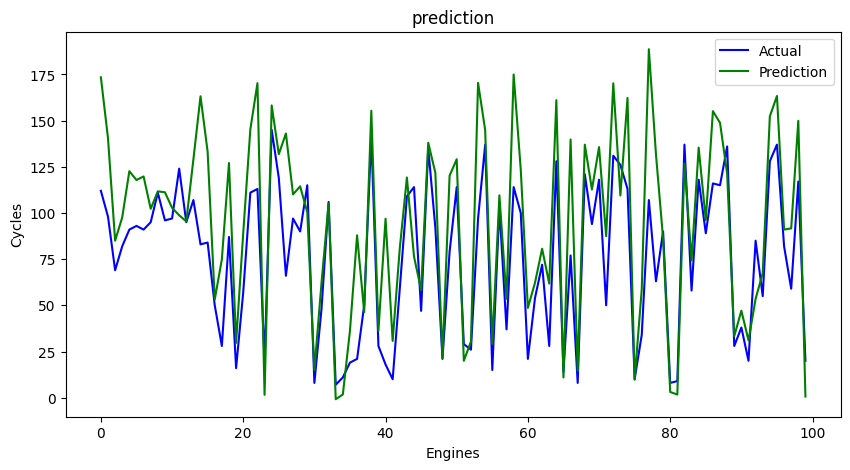

In [61]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(poly_reg_test_predict, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

In [ ]:
# decision tree regression
model_dt = DecisionTreeRegressor(max_depth=7)
# fit the model on the whole dataset
model_dt.fit(x_train_prepared, y_train)
model_dt_train_predictions = model_dt.predict(x_train_prepared)
model_dt_test_predictions = model_dt.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_dt_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_dt_test_predictions)))

print("r2_score on Train data :", r2_score(y_train,model_dt_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_dt_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_dt, x_train_prepared, y_train, cv=cv))

Root Mean Squared Error: 32.09534866534591
Mean Absolute Error: 24.319067970898036
r2_score on Train data : 0.6247808966557462
r2_score on Test data : 0.4034804909704117
 
MAE: -31.622 (0.681)
Cross validation score: [0.62397856 0.59446839 0.59818302 0.57378783 0.58455255 0.59823643
 0.58070199 0.58513406 0.59025384 0.58912118 0.60699541 0.60093698
 0.59440316 0.61454731 0.59041014 0.59579157 0.56686915 0.580808
 0.59037973 0.59593764 0.58461942 0.58084814 0.5919243  0.58007917
 0.58997844 0.58359468 0.61634951 0.60006144 0.58958829 0.60723695]


In [ ]:
# DecisionTreeRegression with Parameter Tunning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

model_dt = DecisionTreeRegressor()

parametrs = {
    "criterion": ["squared_error", "absolute_error"],
    "min_samples_split": [2, 4, 6, 8, 10],
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}

dt_model = RandomizedSearchCV(model_dt, parametrs, verbose=2, random_state=42, n_jobs=-1)
dt_model.fit(x_train_prepared, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   random_state=42, verbose=2)

In [65]:
dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'criterion': 'absolute_error'}

In [66]:
dt_model_train_predictions = dt_model.predict(x_train_prepared)
dt_model_test_predictions = dt_model.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,dt_model_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,dt_model_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, dt_model_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, dt_model_test_predictions)))

r2_score on Train data : 0.6075635980323886
r2_score on Test data : 0.4501582516711162
Root Mean Squared Error: 30.814039008218316
Mean Absolute Error: 23.64


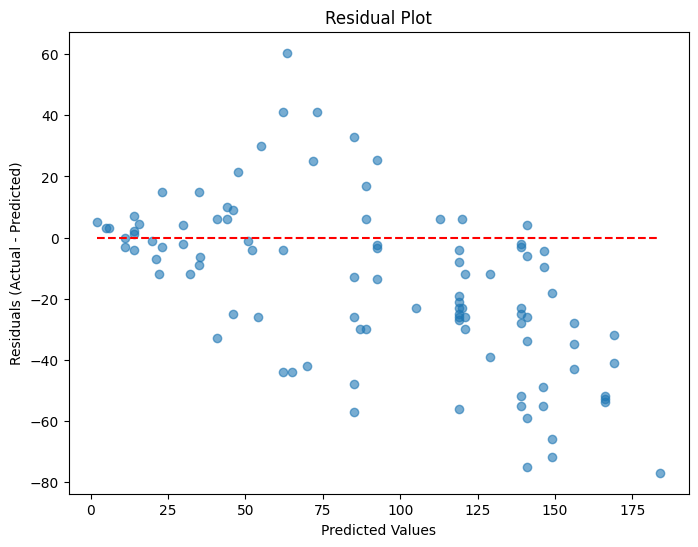

In [68]:
import matplotlib.pyplot as plt

# Use the best estimator from RandomizedSearchCV
best_model = dt_model.best_estimator_

# Predict on test data
y_pred = best_model.predict(x_test_prepared)

# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of predicted values vs residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


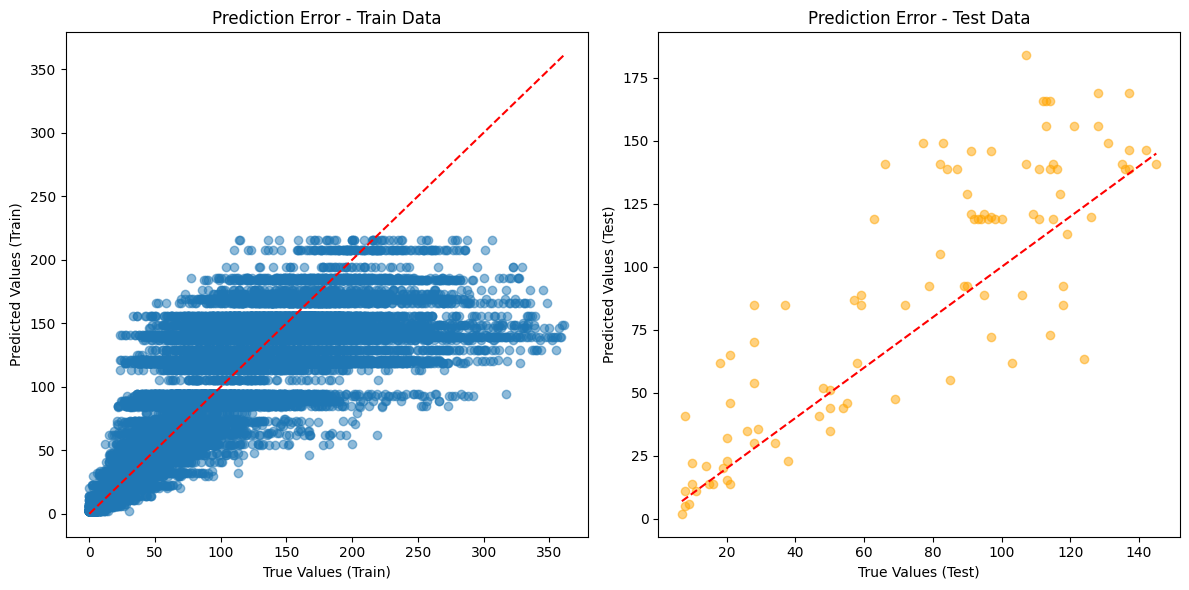

In [70]:
import matplotlib.pyplot as plt

# Use best estimator if you used RandomizedSearchCV
best_model = dt_model.best_estimator_

# Predict on training and test sets
y_train_pred = best_model.predict(x_train_prepared)
y_test_pred = best_model.predict(x_test_prepared)

plt.figure(figsize=(12,6))

# Plot train data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
plt.xlabel('True Values (Train)')
plt.ylabel('Predicted Values (Train)')
plt.title('Prediction Error - Train Data')

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('True Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Prediction Error - Test Data')

plt.tight_layout()
plt.show()


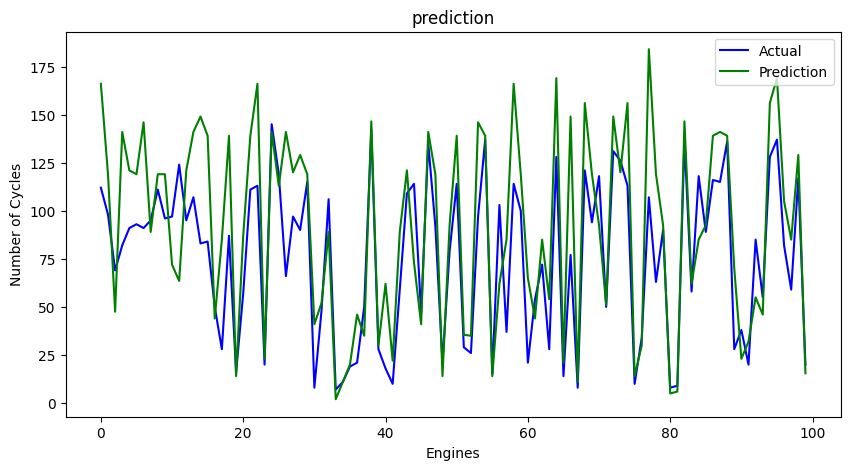

In [71]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(dt_model_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Number of Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

In [ ]:
# lasso regression
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)

model_lasso.fit(x_train_prepared, y_train)
model_lasso_train_predictions = model_lasso.predict(x_train_prepared)
model_lasso_test_predictions = model_lasso.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_lasso_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_lasso_test_predictions)))

print("r2_score on Train data :", r2_score(y_train,model_lasso_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_lasso_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lasso, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation score:", cross_val_score(model_lasso, x_train_prepared, y_train, cv=cv))

Root Mean Squared Error: 32.040020705119495
Mean Absolute Error: 25.593458887488367
r2_score on Train data : 0.5794931052623815
r2_score on Test data : 0.405535353228474
 
MAE: -34.143 (0.717)
Cross validation score: [0.60851565 0.57879091 0.5809357  0.56030258 0.57430205 0.59029501
 0.55807059 0.56773379 0.59566189 0.57108391 0.58909338 0.59016744
 0.5821707  0.59897488 0.59211532 0.58171435 0.55217609 0.5608538
 0.57217435 0.56466251 0.57080703 0.57457964 0.57065806 0.55973113
 0.58157013 0.5747839  0.59454514 0.59136309 0.58073403 0.58952857]


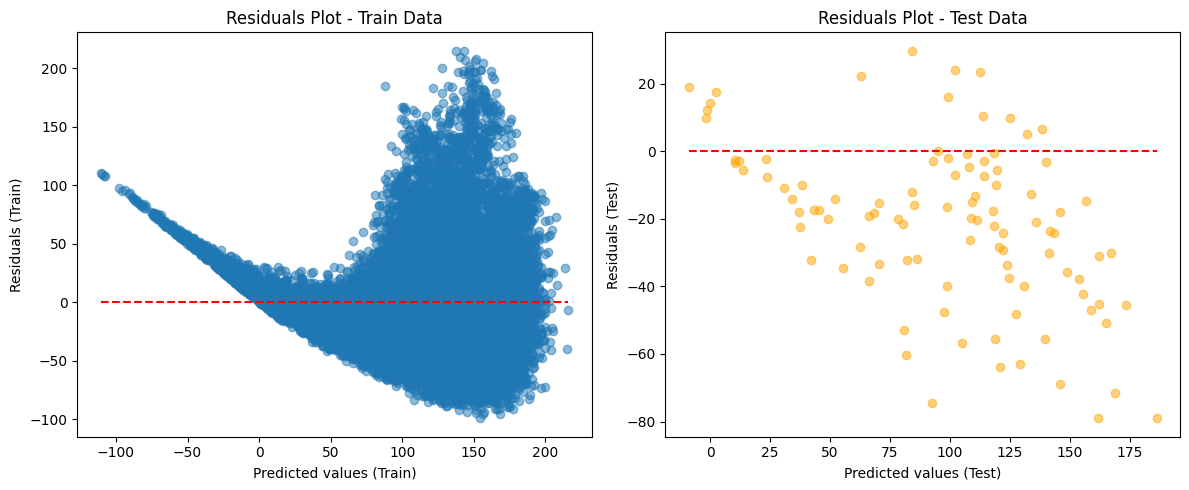

In [73]:
import matplotlib.pyplot as plt

# Predict on train and test data
y_train_pred = model_lasso.predict(x_train_prepared)
y_test_pred = model_lasso.predict(x_test_prepared)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

# Plot residuals for train data
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted values (Train)')
plt.ylabel('Residuals (Train)')
plt.title('Residuals Plot - Train Data')

# Plot residuals for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted values (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Residuals Plot - Test Data')

plt.tight_layout()
plt.show()


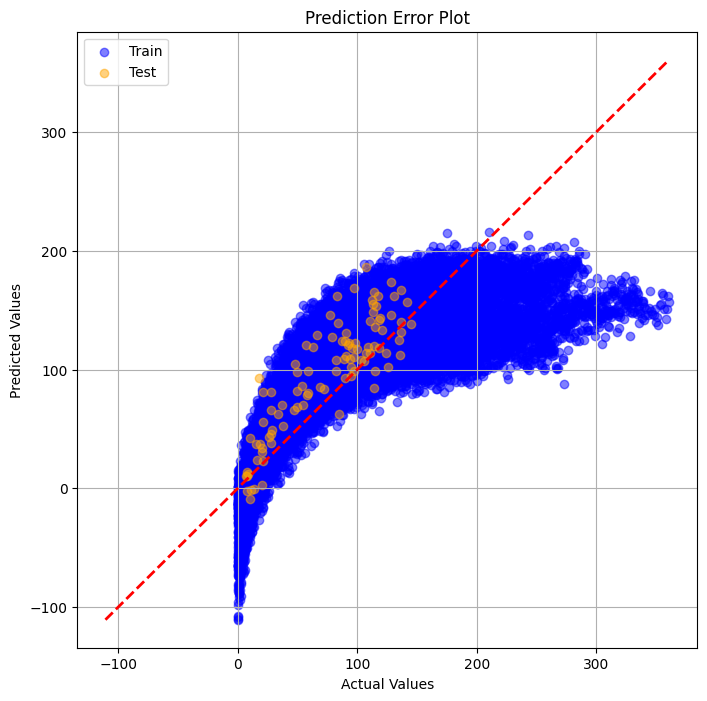

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_train_pred = model_lasso.predict(x_train_prepared)
y_test_pred = model_lasso.predict(x_test_prepared)

plt.figure(figsize=(8, 8))

# Scatter for train data
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')

# Scatter for test data
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.5, label='Test')

# Perfect prediction line (y = x)
min_val = min(np.min(y_train), np.min(y_test), np.min(y_train_pred), np.min(y_test_pred))
max_val = max(np.max(y_train), np.max(y_test), np.max(y_train_pred), np.max(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.legend()
plt.grid(True)
plt.show()


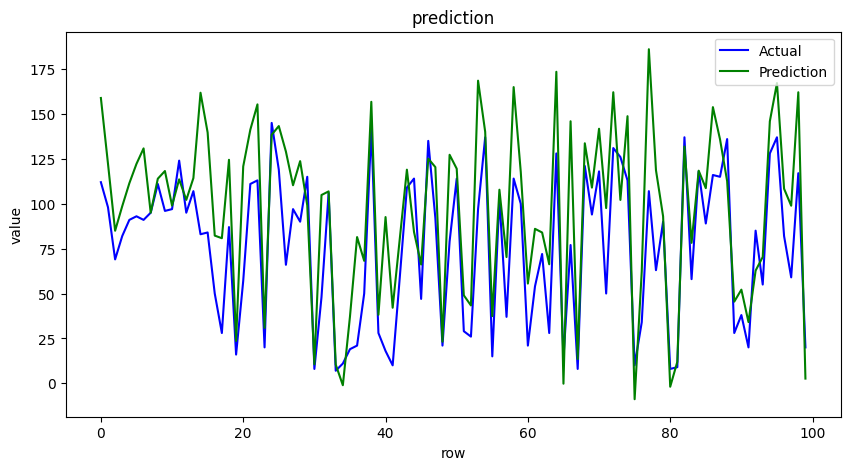

In [76]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(model_lasso_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

In [ ]:
# randomforest regression
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor(max_depth=7)
randf.fit(x_train_prepared, y_train)
model_random_train_predictions = randf.predict(x_train_prepared)
model_random_test_predictions = randf.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,model_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_random_test_predictions)))

print("Cross validation score:", cross_val_score(randf, x_train_prepared, y_train, cv=10))

r2_score on Train data : 0.6506209796256095
r2_score on Test data : 0.42338847930011525
Root Mean Squared Error: 31.55523579544925
Mean Absolute Error: 23.92049107242311
Cross validation score: [0.71683211 0.7075725  0.53322187 0.72028354 0.73599128 0.54283113
 0.4090342  0.66395237 0.55481893 0.54726552]


In [ ]:
# Randomforest Regression with parameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10, 30, 50, 70, 100],
            "max_features"      : [1, 2, 3, 4, 5],
            "min_samples_split" : [2,3, 5, 7, 9],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(model_rf, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train_prepared, y_train)
model_random_train_predictions = grid.predict(x_train_prepared)
model_random_test_predictions = grid.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,model_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,model_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_random_test_predictions)))

r2_score on Train data : 0.8731999620969281
r2_score on Test data : 0.40537854021790565
Root Mean Squared Error: 32.04424632294105
Mean Absolute Error: 23.52081299496771


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

randf = RandomForestRegressor(random_state = 42)
n_estimators = [10, 50, 75, 100]
max_features = [1, 2, 3, 4]
max_depth = [1, 2, 3, 4, 5]
min_samples_split = [1, 2, 3, 4, 5]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(randf,random_grid, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_prepared, y_train)
rf_random_train_predictions = rf_random.predict(x_train_prepared)
rf_random_test_predictions = rf_random.predict(x_test_prepared)

print("r2_score on Train data :", r2_score(y_train,rf_random_train_predictions)) 
print("r2_score on Test data :", r2_score(y_test,rf_random_test_predictions)) 

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, rf_random_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, rf_random_test_predictions)))

print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf_random, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
r2_score on Train data : 0.6117518993960955
r2_score on Test data : 0.5154484446254719
Root Mean Squared Error: 28.926758384046234
Mean Absolute Error: 22.80999999028916
 
MAE: -31.812 (0.656)


In [80]:
rf_random.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'max_features': 2,
 'max_depth': 5,
 'bootstrap': True}

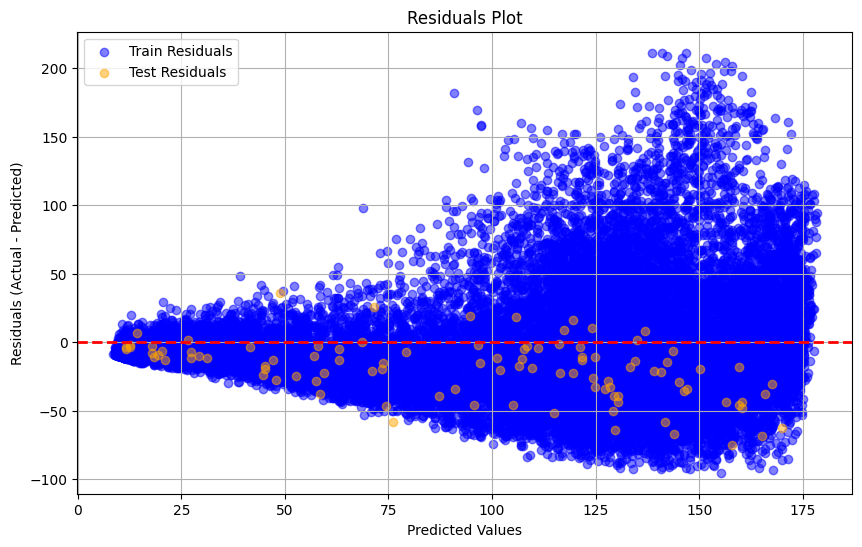

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_train_pred = rf_random.predict(x_train_prepared)
y_test_pred = rf_random.predict(x_test_prepared)

# Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(10, 6))

# Plot residuals for train data
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.5, label='Train Residuals')

# Plot residuals for test data
plt.scatter(y_test_pred, residuals_test, color='orange', alpha=0.5, label='Test Residuals')

# Horizontal line at 0 residual
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


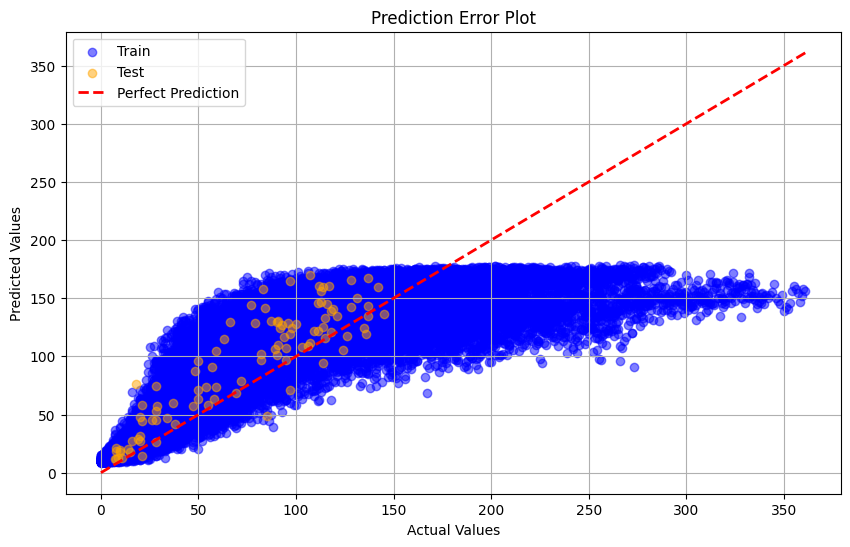

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_train_pred = rf_random.predict(x_train_prepared)
y_test_pred = rf_random.predict(x_test_prepared)

plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.5, label='Test')

# Perfect prediction line
min_val = min(np.min(y_train), np.min(y_test))
max_val = max(np.max(y_train), np.max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.legend()
plt.grid(True)
plt.show()


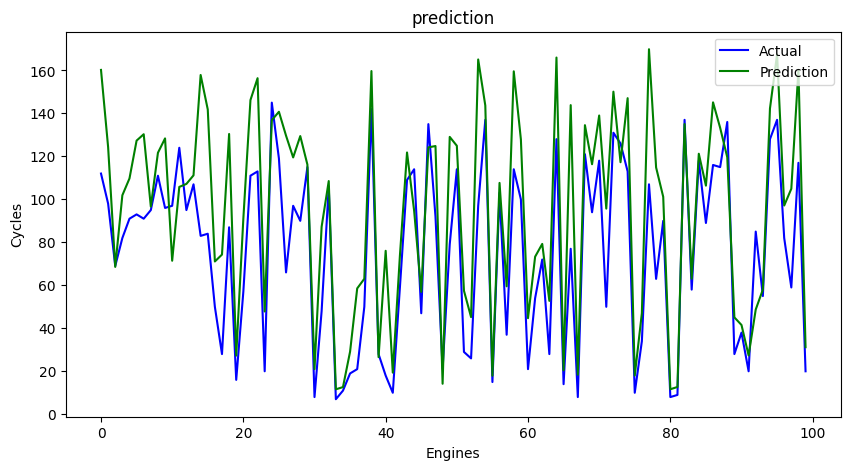

In [83]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(rf_random_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

In [ ]:
# LGBM Regressor with parameter tuning
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(max_depth=7, num_leaves = 2)
# fit the model on the whole dataset
model_lgbm.fit(x_train_prepared, y_train)
model_lgbm_train_predictions = model_lgbm.predict(x_train_prepared)
model_lgbm_test_predictions = model_lgbm.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_lgbm_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_lgbm_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_lgbm_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_lgbm_test_predictions)) 
print(' ')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lgbm, x_train_prepared, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Cross validation accuracy:", cross_val_score(model_lgbm, x_train_prepared, y_train, cv=10))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 20631, number of used features: 16
[LightGBM] [Info] Start training from score 107.807862
Root Mean Squared Error: 31.935127036621545
Mean Absolute Error: 25.14717832751449
Accuracy on Train data : 0.6149852619252605
Accuracy on Test data : 0.40942133740430864
 
MAE: -32.006 (0.670)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 18567, number of used features: 16
[LightGBM] [Info] Start training from score 107.223838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `f

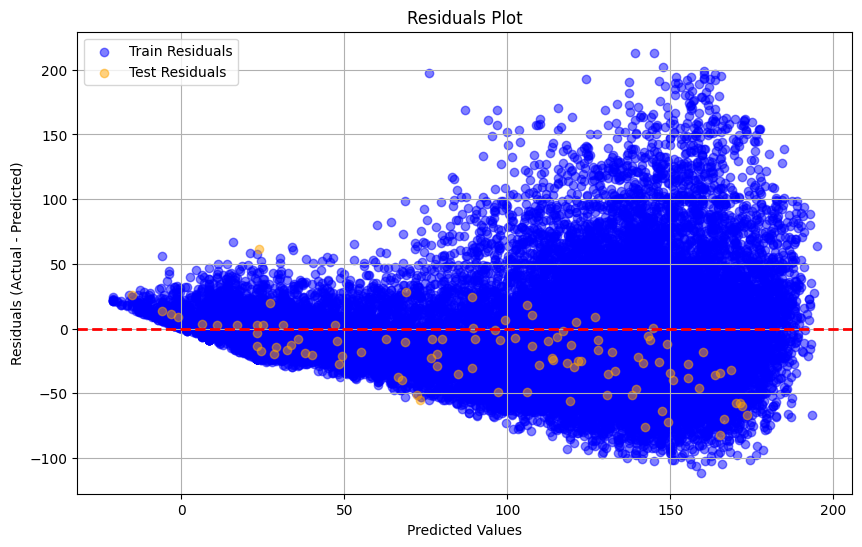

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_train_pred = model_lgbm.predict(x_train_prepared)
y_test_pred = model_lgbm.predict(x_test_prepared)

# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))

# Scatter residuals vs predicted values for train
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5, label='Train Residuals')

# Scatter residuals vs predicted values for test
plt.scatter(y_test_pred, test_residuals, color='orange', alpha=0.5, label='Test Residuals')

# Horizontal line at 0 residual
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


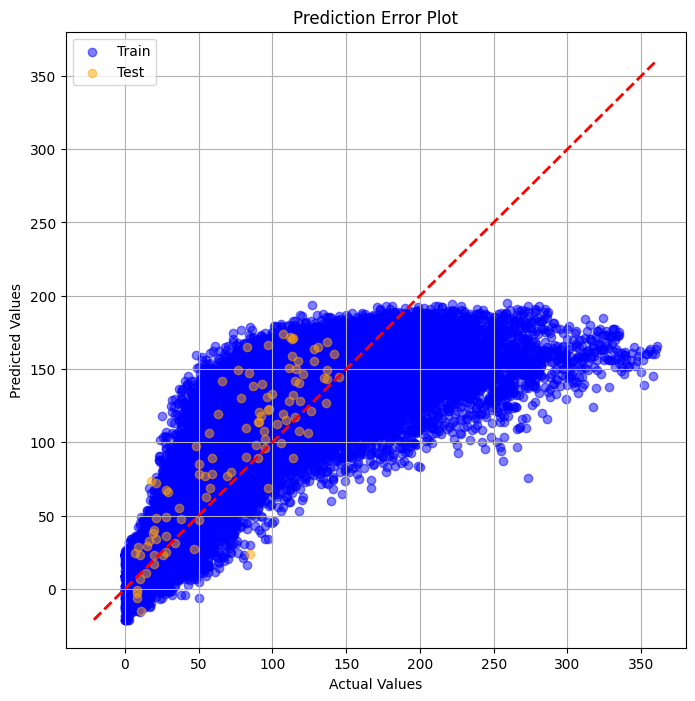

In [87]:
import matplotlib.pyplot as plt

# Predict on train and test sets
y_train_pred = model_lgbm.predict(x_train_prepared)
y_test_pred = model_lgbm.predict(x_test_prepared)

plt.figure(figsize=(8, 8))

# Plot predicted vs actual for train data
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')

# Plot predicted vs actual for test data
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.5, label='Test')

# Perfect prediction line (y=x)
min_val = min(min(y_train.min(), y_test.min()), min(y_train_pred.min(), y_test_pred.min()))
max_val = max(max(y_train.max(), y_test.max()), max(y_train_pred.max(), y_test_pred.max()))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# XGBRegressor with parameter tuning
from xgboost import XGBRegressor
model_xgb = XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=7, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=27)
model_xgb.fit(x_train_prepared, y_train)
model_xgb_train_predictions = model_xgb.predict(x_train_prepared)
model_xgb_test_predictions = model_xgb.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_xgb_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_xgb_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_xgb_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_xgb_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(model_xgb, x_train_prepared, y_train, cv=10))

Root Mean Squared Error: 32.829779676290094
Mean Absolute Error: 23.972333908081055
Accuracy on Train data : 0.7803250551223755
Accuracy on Test data : 0.3758680820465088
Cross validation accuracy: [0.72348577 0.70787525 0.54333645 0.70246214 0.72838485 0.51433539
 0.3938306  0.66556931 0.55967104 0.55848157]


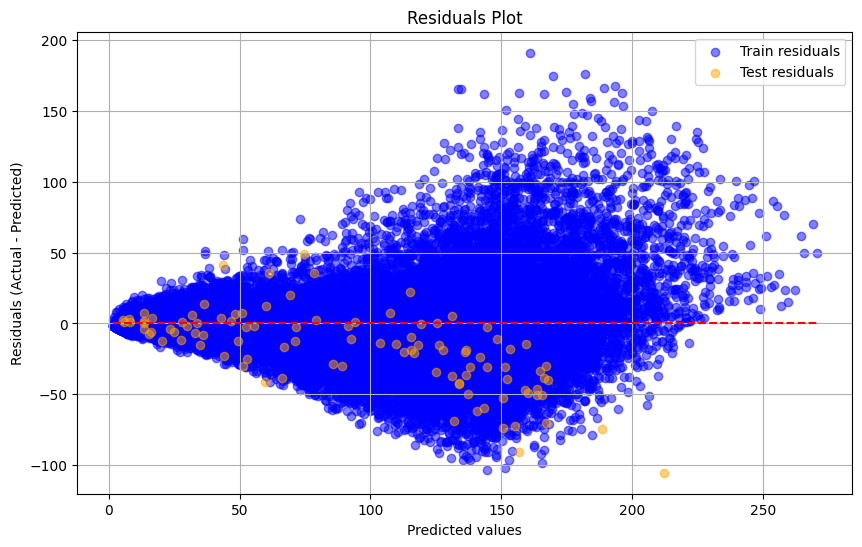

In [90]:
import matplotlib.pyplot as plt

# Predict on train and test
y_train_pred = model_xgb.predict(x_train_prepared)
y_test_pred = model_xgb.predict(x_test_prepared)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10,6))

# Residual plot for train data
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5, label='Train residuals')

# Residual plot for test data
plt.scatter(y_test_pred, test_residuals, color='orange', alpha=0.5, label='Test residuals')

plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), colors='red', linestyles='dashed')

plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


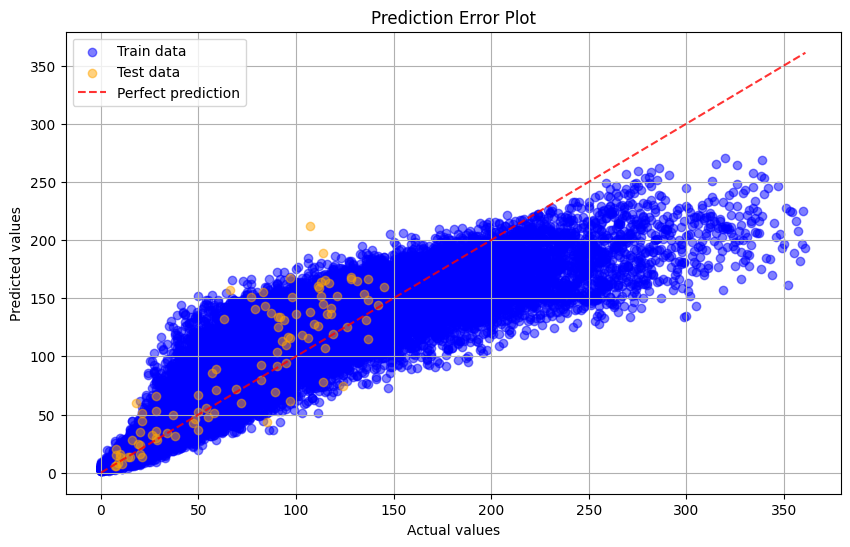

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on train and test data
y_train_pred = model_xgb.predict(x_train_prepared)
y_test_pred = model_xgb.predict(x_test_prepared)

plt.figure(figsize=(10, 6))

# Plot training predictions
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train data')

# Plot test predictions
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.5, label='Test data')

# Plot the perfect prediction line
lims = [
    np.min([y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min()]),
    np.max([y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max()]),
]
plt.plot(lims, lims, 'r--', alpha=0.8, label='Perfect prediction')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction Error Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# CatBoostRegressor with parameter Tuning
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(verbose=0, n_estimators=100, max_depth=7,learning_rate =0.1)
model_cat.fit(x_train_prepared, y_train)
model_cat_train_predictions = model_cat.predict(x_train_prepared)
model_cat_test_predictions = model_cat.predict(x_test_prepared)

print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, model_cat_test_predictions)**0.5))
print('Mean Absolute Error:', (metrics.mean_absolute_error(y_test, model_cat_test_predictions)))

print("Accuracy on Train data :", r2_score(y_train,model_cat_train_predictions)) 
print("Accuracy on Test data :", r2_score(y_test,model_cat_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(model_cat, x_train_prepared, y_train, cv=10))

Root Mean Squared Error: 31.25340902017025
Mean Absolute Error: 22.8227389118037
Accuracy on Train data : 0.6679950488043246
Accuracy on Test data : 0.43436633815196046
Cross validation accuracy: [0.72878315 0.71272761 0.55860583 0.7220684  0.7531919  0.53876503
 0.39445081 0.67997691 0.56439028 0.57389073]


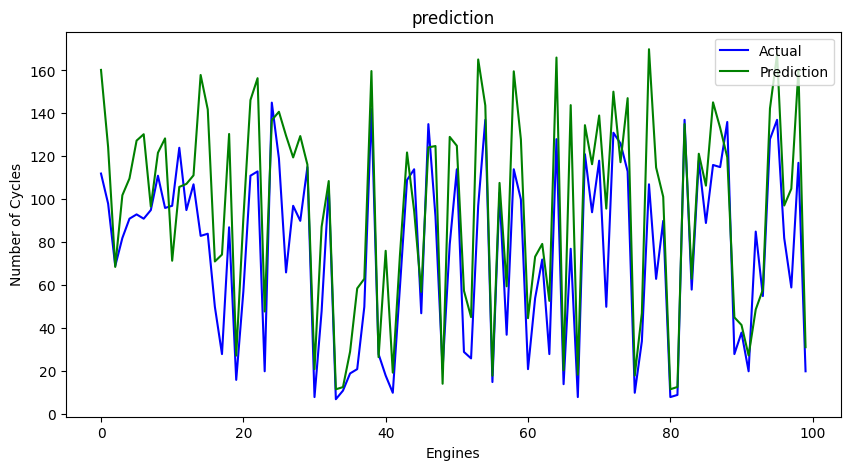

In [ ]:
# Actual vs predicted output values for the RandomForest Regression model.
fig = plt.figure(figsize=(10, 5))
plt.plot(y_test, color="blue")
plt.plot(rf_random_test_predictions, color="green")
plt.title('prediction')
plt.ylabel('Number of Cycles')
plt.xlabel('Engines')
plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show() 

## Results Comparision

Algorithms implemented for finding the RUL prediction.

1. Linear Regression
2. Decision tree Regression
3. Polynomial Regression
4. Lasso Regression 
5. RandomForest Regression 
6. LGBM Regression
7. XGBoost Regression
8. CatBoost Regressor 

Among the models, we have linear models and non-linear models. The data is non-linear with the target variable. As per the results, non-linear models performed better than linear models.
Best parameters for Random Forest Regression is {'n_estimators': 75,
 'min_samples_split': 2,
 'max_features': 2,
 'max_depth': 5,
 'bootstrap': True}

RANDOM FOREST REGRESSION outperformed all the other models with an r2_score of 0.5154 and with an RMSE of ±28.96


|  Model                  | r2_score (Train) | r2-score (Test)  | RMSE      | MAE          | 
|-------------------------|------------------|------------------|-----------|--------------|
| Linear Regression       | 0.5794           | 0.4054           |  32.04    | 25.59        |
| Polynomial Regression   | 0.6269           | 0.4332           |  31.28    | 23.84        |
| Decisiontree Regression | 0.6076           | 0.4502           |  30.84    | 23.6         |
| Lasso Regression        | 0.5794           | 0.4054           |  32.04    | 25.59        |
| Randomforest Regression | 0.6117           | 0.5154           |  28.96    | 23.66        | 
| LGBM Regression         | 0.6146           | 0.4135           |  31.82    | 25.11        |
| XGBRegression           | 0.7756           | 0.3685           |  33.02    | 24.09        |
| CatBoostRegresson       | 0.6679           | 0.4343           |  31.25    | 22.82        |

